# Lab 04_05
### 1.Convolution Neural Networks 
### 2.Convolutions, Pooling, Activation functions, BatchNorm & Dropout
### 3.Training, Predictions
### 4.VGG Architecture
### 4.Pretained CNN weights from Imagenet Data(VGG16 & Resnet)

In [1]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.9.1
0.24.1


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


# Data Cifar-10

In [2]:
'''
import torchvision.transforms as transforms
from PIL import Image
import torch
img = Image.open("pizza.jpeg")
print(img)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
tensor_img = transform(img)
print("Shape:", tensor_img.shape)
print("Min value:", torch.min(tensor_img))
print("Max value:", torch.max(tensor_img))
import torchvision.transforms as transforms
from PIL import Image
import torch

img = Image.open("pizza.jpeg").convert("L")   # Convert to grayscale

transform = transforms.Compose([
    transforms.ToTensor(),                   # Shape → (1, H, W)
    transforms.Normalize((0.5,), (0.5,))     # Only ONE mean & std
])

tensor_img = transform(img)

print("Shape:", tensor_img.shape)
print("Min value:", torch.min(tensor_img))
print("Max value:", torch.max(tensor_img))'''

'\nimport torchvision.transforms as transforms\nfrom PIL import Image\nimport torch\nimg = Image.open("pizza.jpeg")\nprint(img)\ntransform = transforms.Compose([\n    transforms.ToTensor(),\n    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))\n])\ntensor_img = transform(img)\nprint("Shape:", tensor_img.shape)\nprint("Min value:", torch.min(tensor_img))\nprint("Max value:", torch.max(tensor_img))\nimport torchvision.transforms as transforms\nfrom PIL import Image\nimport torch\n\nimg = Image.open("pizza.jpeg").convert("L")   # Convert to grayscale\n\ntransform = transforms.Compose([\n    transforms.ToTensor(),                   # Shape → (1, H, W)\n    transforms.Normalize((0.5,), (0.5,))     # Only ONE mean & std\n])\n\ntensor_img = transform(img)\n\nprint("Shape:", tensor_img.shape)\nprint("Min value:", torch.min(tensor_img))\nprint("Max value:", torch.max(tensor_img))'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [5]:
print("CIFAR-10 Classes:")
print(trainset.classes)

CIFAR-10 Classes:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Data Visualizing

In [6]:
# get one sample
img, label = trainset[0]
print(img)
print(label)

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [7]:
img.shape

torch.Size([3, 32, 32])

In [ ]:
# denormalize
img_denorm = img * 0.5 + 0.5
print(img_denorm)
plt.figure(figsize=(3,3))
plt.imshow(np.transpose(img_denorm.numpy(), (1,2,0)))
plt.title(f"Label: {trainset.classes[label]}")
plt.axis("off")
plt.show()

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [ ]:
# get a batch
dataiter = iter(trainloader)
images, labels = next(dataiter)

# denormalize
images = images * 0.5 + 0.5

# plot grid
fig, axes = plt.subplots(4, 8, figsize=(16,8))

for i in range(32):
    r, c = i//8, i%8
    img = images[i].permute(1,2,0).numpy()
    axes[r][c].imshow(img)
    axes[r][c].set_title(trainset.classes[labels[i]], fontsize=8)
    axes[r][c].axis("off")

plt.suptitle("CIFAR-10 Sample Batch", fontsize=16)
plt.tight_layout()
plt.show()

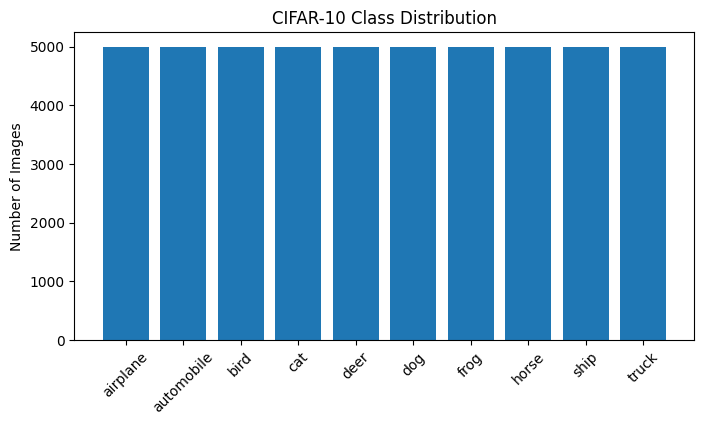

In [35]:
from collections import Counter

label_list = trainset.targets
counter = Counter(label_list)

plt.figure(figsize=(8,4))
plt.bar(trainset.classes, [counter[i] for i in range(10)])
plt.xticks(rotation=45)
plt.title("CIFAR-10 Class Distribution")
plt.ylabel("Number of Images")
plt.show()

In [36]:
print(counter)

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


# CNN Models

In [3]:
class CIFAR10Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        # input 3x32x32, output 32x32x32
        x = self.act1(self.conv1(x))
        # input 32x32x32, output 32x32x32
        x = self.act2(self.conv2(x))
        # input 32x32x32, output 32x16x16
        x = self.pool2(x)
        # input 32x16x16, output 8192
        x = self.flat(x)
        # input 8192, output 512
        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        # input 512, output 10
        x = self.fc4(x)
        return x

model = CIFAR10Model().to(device)

In [12]:
import torch
import torch.nn as nn

class CIFAR10Model(nn.Module):
    def __init__(self):
        super().__init__()

        # ---- Block 1 ----
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.act1  = nn.ReLU()

        # ---- Block 2 ----
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.bn2   = nn.BatchNorm2d(32)
        self.act2  = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)

        # ---- Classifier ----
        self.flat = nn.Flatten()

        self.fc3  = nn.Linear(8192, 512)
        self.bn3  = nn.BatchNorm1d(512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):

        # 3x32x32 → 32x32x32
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)

        # 32x32x32 → 32x32x32
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)

        # 32x32x32 → 32x16x16
        x = self.pool2(x)

        # 32x16x16 → 8192
        x = self.flat(x)

        # 8192 → 512
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.act3(x)
        x = self.drop3(x)

        # 512 → 10
        x = self.fc4(x)

        return x


model = CIFAR10Model().to(device)
print(model)

CIFAR10Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (drop1): Dropout(p=0.3, inplace=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc3): Linear(in_features=8192, out_features=512, bias=True)
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): ReLU()
  (drop3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
#VGG16

In [15]:
import torch
import torch.nn as nn
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        # Block 1
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Block 2
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Block 3
        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Block 4
        self.block4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Block 5
        self.block5 = nn.Sequential(
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)

        x = self.flatten(x)
        x = self.classifier(x)
        return x

In [16]:
#VGG19

In [17]:
class VGG19(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            # Block 2
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            # Block 3 (4 conv)
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            # Block 4 (4 conv)
            nn.Conv2d(256, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            # Block 5 (4 conv)
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

# Training

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
epochs = 10

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(epochs):

    # ===== TRAIN =====
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # ===== VALIDATION =====
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(testloader)
    val_acc = 100 * correct / total

    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.3f} "
          f"Train Acc: {train_acc:.2f}% "
          f"Val Loss: {val_loss:.4f} "
          f"Val Acc: {val_acc:.2f}%")

Epoch [1/10] Train Loss: 1.450 Train Acc: 47.78% Val Loss:: 1.12% Val Acc: 60.45%
Epoch [2/10] Train Loss: 1.087 Train Acc: 61.37% Val Loss:: 0.98% Val Acc: 65.74%
Epoch [3/10] Train Loss: 0.944 Train Acc: 66.57% Val Loss:: 0.92% Val Acc: 67.67%
Epoch [4/10] Train Loss: 0.837 Train Acc: 70.57% Val Loss:: 0.89% Val Acc: 68.46%
Epoch [5/10] Train Loss: 0.746 Train Acc: 73.72% Val Loss:: 0.87% Val Acc: 70.19%
Epoch [6/10] Train Loss: 0.668 Train Acc: 76.29% Val Loss:: 0.85% Val Acc: 70.69%
Epoch [7/10] Train Loss: 0.602 Train Acc: 78.33% Val Loss:: 0.88% Val Acc: 71.04%
Epoch [8/10] Train Loss: 0.536 Train Acc: 80.83% Val Loss:: 0.89% Val Acc: 70.74%
Epoch [9/10] Train Loss: 0.486 Train Acc: 82.46% Val Loss:: 0.93% Val Acc: 71.16%
Epoch [10/10] Train Loss: 0.447 Train Acc: 84.02% Val Loss:: 0.97% Val Acc: 70.24%


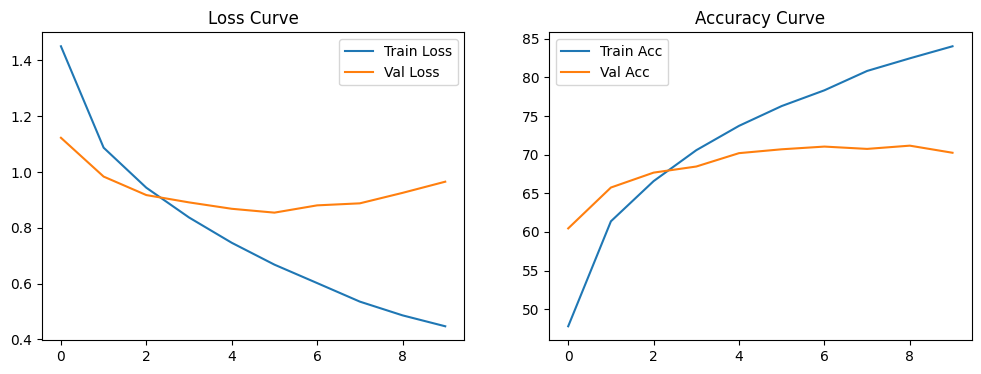

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

In [8]:
torch.save(model.state_dict(), "cifar10model.pth")
print("Model saved!")

Model saved!


<Figure size 800x800 with 0 Axes>

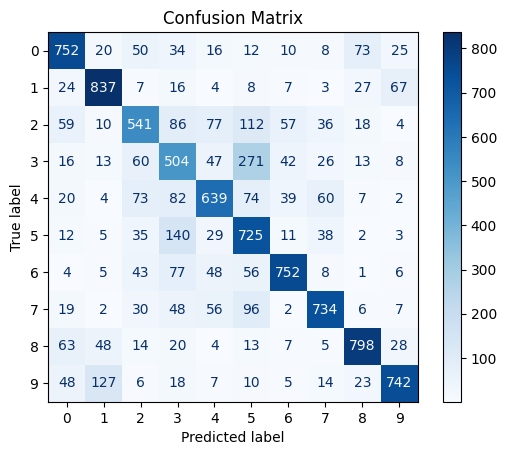

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [31]:
from sklearn.metrics import classification_report

# CIFAR-10 class names
class_names = testset.classes

report = classification_report(
    all_labels,
    all_preds,
    target_names=class_names,
    digits=4
)

print("📊 Classification Report:\n")
print(report)

📊 Classification Report:

              precision    recall  f1-score   support

    airplane     0.7394    0.7520    0.7457      1000
  automobile     0.7815    0.8370    0.8083      1000
        bird     0.6298    0.5410    0.5820      1000
         cat     0.4917    0.5040    0.4978      1000
        deer     0.6893    0.6390    0.6632      1000
         dog     0.5265    0.7250    0.6100      1000
        frog     0.8069    0.7520    0.7785      1000
       horse     0.7876    0.7340    0.7598      1000
        ship     0.8244    0.7980    0.8110      1000
       truck     0.8318    0.7420    0.7844      1000

    accuracy                         0.7024     10000
   macro avg     0.7109    0.7024    0.7041     10000
weighted avg     0.7109    0.7024    0.7041     10000



In [17]:
classes = trainset.classes

mis_images = []
mis_preds = []
mis_labels = []

model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(len(images)):
            if preds[i] != labels[i]:
                mis_images.append(images[i].cpu())
                mis_preds.append(preds[i].cpu())
                mis_labels.append(labels[i].cpu())

            if len(mis_images) >= 16:
                break
        if len(mis_images) >= 16:
            break

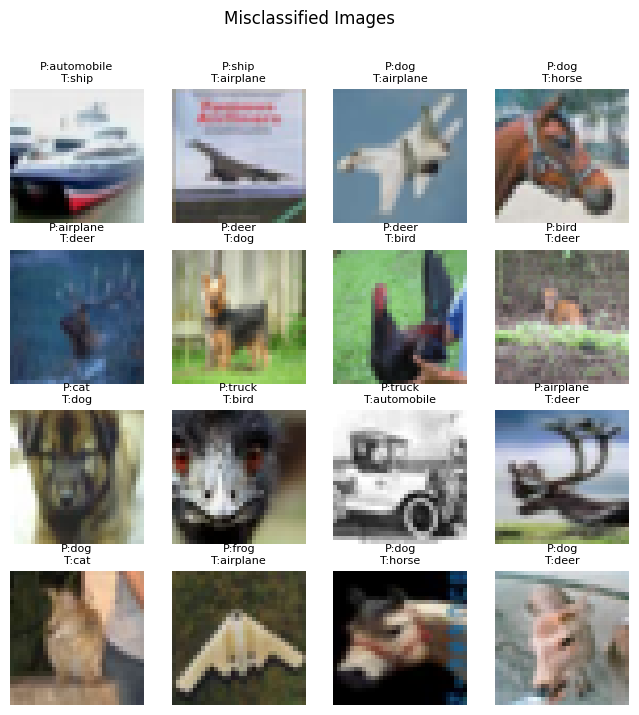

In [18]:
fig, ax = plt.subplots(4,4, figsize=(8,8))

for i in range(16):
    r, c = i//4, i%4
    img = mis_images[i].permute(1,2,0)
    img = img * 0.5 + 0.5  # denormalize

    ax[r][c].imshow(img)
    ax[r][c].set_title(
        f"P:{classes[mis_preds[i]]}\nT:{classes[mis_labels[i]]}",
        fontsize=8
    )
    ax[r][c].axis("off")

plt.suptitle("Misclassified Images")
plt.show()

In [9]:
model.load_state_dict(torch.load("cifar10model.pth"))

<All keys matched successfully>

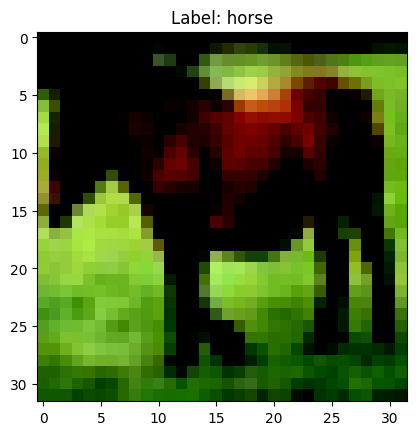

In [23]:
img, label = trainset[7]
#img = img * 0.5 + 0.5
plt.imshow(np.transpose(img.numpy(), (1,2,0)))
plt.title(f"Label: {trainset.classes[label]}")
plt.show()

In [24]:
X = img.unsqueeze(0).to(device)

model.eval()

CIFAR10Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (drop1): Dropout(p=0.3, inplace=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc3): Linear(in_features=8192, out_features=512, bias=True)
  (act3): ReLU()
  (drop3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=512, out_features=10, bias=True)
)

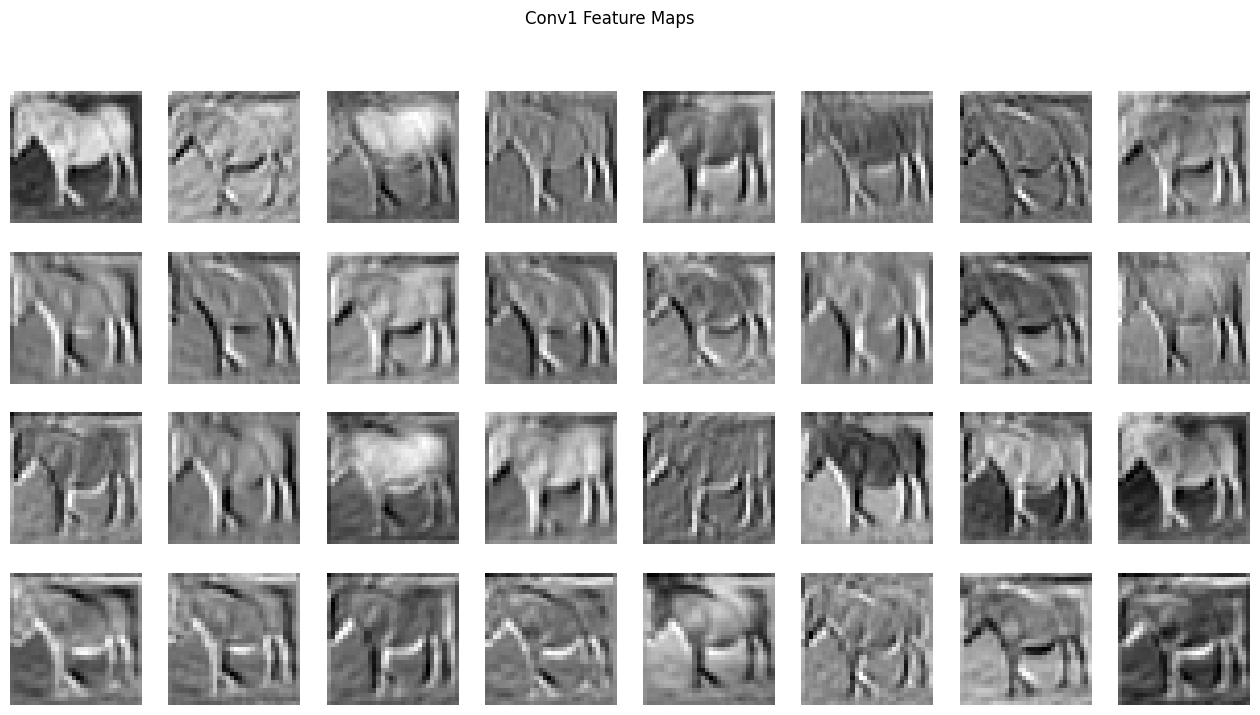

In [25]:
with torch.no_grad():
    fmap1 = model.conv1(X)

fig, ax = plt.subplots(4,8, figsize=(16,8))
for i in range(32):
    r, c = i//8, i%8
    ax[r][c].imshow(fmap1[0,i].cpu(), cmap='gray')
    ax[r][c].axis("off")

plt.suptitle("Conv1 Feature Maps")
plt.show()

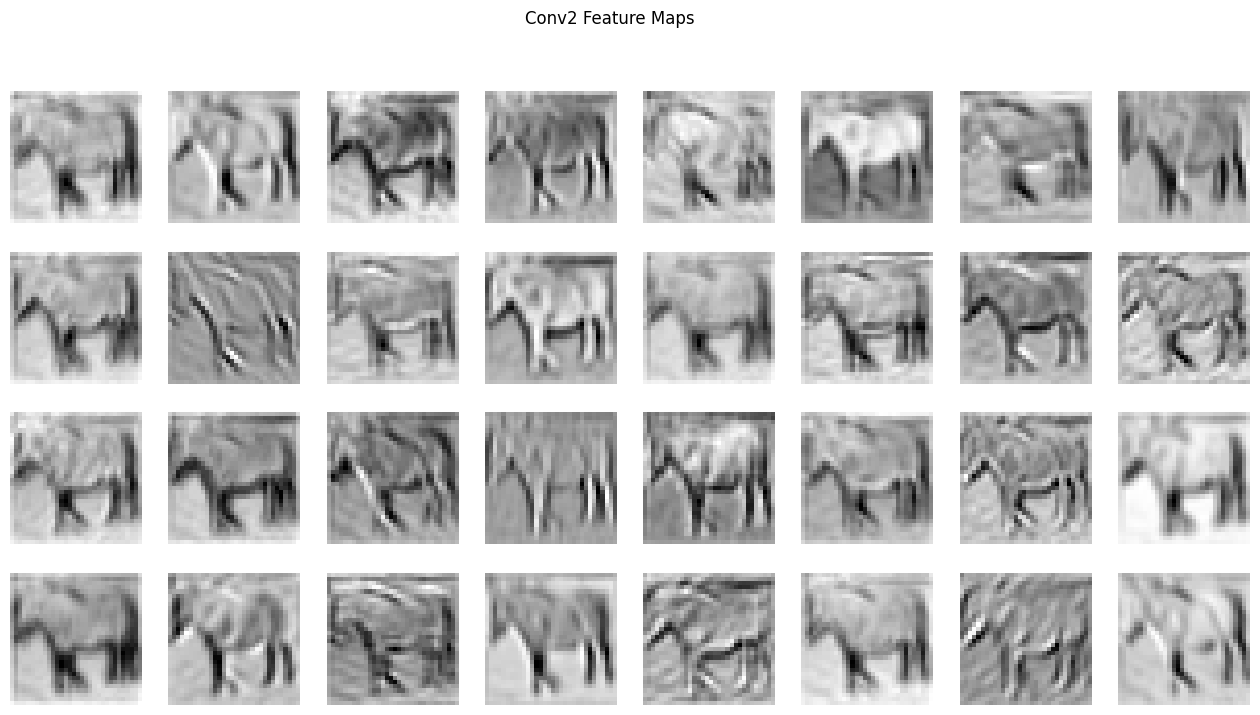

In [26]:
with torch.no_grad():
    x = model.act1(model.bn1(model.conv1(X)))
    fmap2 = model.conv2(x)

fig, ax = plt.subplots(4,8, figsize=(16,8))
for i in range(32):
    r, c = i//8, i%8
    ax[r][c].imshow(fmap2[0,i].cpu(), cmap='gray')
    ax[r][c].axis("off")

plt.suptitle("Conv2 Feature Maps")
plt.show()

# Pre-trained CNN Models(ImageNet Data)
### VGG16

In [5]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import json
import urllib.request

# 1 Load pretrained VGG16
vgg16_model = models.vgg16(pretrained=True)
vgg16_model.eval()

# 2 Preprocessing (ImageNet standard)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# 3 Load image
img_path = "pizza.jpeg"
img = Image.open(img_path).convert("RGB")
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)

# 4 Inference
with torch.no_grad():
    outputs = vgg16_model(input_batch)
    probabilities = F.softmax(outputs, dim=1)


# 5 Load labels
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
class_idx = urllib.request.urlopen(url).read().decode("utf-8").splitlines()
print(class_idx)

# 6 Top 3 Predictions
top3_prob, top3_catid = torch.topk(probabilities, 3)

print("Predictions:")
for i in range(top3_prob.size(1)):
    print(f"{class_idx[top3_catid[0][i]]} : {top3_prob[0][i].item():.4f}")

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

In [6]:
class_idx[0]

'tench'

In [12]:
# 5 Load labels
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
class_idx = urllib.request.urlopen(url).read().decode("utf-8").splitlines()
print(class_idx[0:20])

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee']


In [5]:
print(vgg16_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
from torchinfo import summary
summary(vgg16_model)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

# Lab Task 1 

# 1. Identify Problems In Model building and Training
# 2. Train the model with best approach you can understand
# 3. Visualize the convolution layers
# 4. Prediction on user input from camera/uploaded image

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess an uploaded image for CIFAR-10 prediction
img_path = "pizza.jpeg"  # Replace with your own image path
img = Image.open(img_path).convert("RGB")

# CIFAR-10 transform: resize to 32x32, normalize
predict_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

input_tensor = predict_transform(img)
input_batch = input_tensor.unsqueeze(0).to(device)

# Predict
model.eval()
with torch.no_grad():
    outputs = model(input_batch)
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    top3_prob, top3_idx = torch.topk(probabilities, 3)

# Show image and predictions
classes = trainset.classes

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

print("\nTop-3 Predictions:")
for i in range(3):
    print(f"  {classes[top3_idx[0][i]]}: {top3_prob[0][i].item():.4f}")
